# Prediction of Diabetes using Artificial Neural Network

In [1]:
#Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Data Gathering

In [2]:
#Importing dataset
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data)

       PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0        1354778            0            171                      80   
1        1147438            8             92                      93   
2        1640031            7            115                      47   
3        1883350            9            103                      78   
4        1424119            1             85                      59   
...          ...          ...            ...                     ...   
14995    1490300           10             65                      60   
14996    1744410            2             73                      66   
14997    1742742            0             93                      89   
14998    1099353            0            132                      98   
14999    1386396            3            114                      65   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
0                    34            23  43.509726          1.

## Part 2: Data Analysis

In [3]:
#Preview the data
diabetes_data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
#Checking the shape of data that is number of rows and columns
diabetes_data.shape

(15000, 10)

In [5]:
#Checking the attributes of the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [6]:
#Deleting the patient ID column 
del diabetes_data['PatientID']

In [7]:
#Checking for null values
print (diabetes_data.isnull().values.any())
diabetes_data.isnull().sum()

False


Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [8]:
#Statistical summary of data
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,15000.0,3.224533,3.391020,0.000000,0.000000,2.000000,6.000000,14.000000
PlasmaGlucose,15000.0,107.856867,31.981975,44.000000,84.000000,104.000000,129.000000,192.000000
DiastolicBloodPressure,15000.0,71.220667,16.758716,24.000000,58.000000,72.000000,85.000000,117.000000
TricepsThickness,15000.0,28.814000,14.555716,7.000000,15.000000,31.000000,41.000000,93.000000
SerumInsulin,15000.0,137.852133,133.068252,14.000000,39.000000,83.000000,195.000000,799.000000
BMI,15000.0,31.509646,9.759000,18.200512,21.259887,31.767940,39.259692,56.034628
DiabetesPedigree,15000.0,0.398968,0.377944,0.078044,0.137743,0.200297,0.616285,2.301594
Age,15000.0,30.137733,12.089703,21.000000,22.000000,24.000000,35.000000,77.000000
Diabetic,15000.0,0.333333,0.471420,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
#Using Histogram to represent the statistical summary
#diabetes_data.hist(bins=10,figsize=(10,10))
#plt.show()

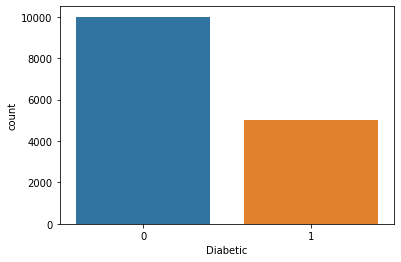

In [10]:
# Outcome countplot
sns.countplot(x = 'Diabetic',data = diabetes_data)

## Part 3: Data Preprocessing

###    A. Feature Selection 

In [11]:
#Feature Selection using Chi-square method

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = diabetes_data.iloc[:,0:8] 
y = diabetes_data.iloc[:,-1]   
imp_features = SelectKBest(score_func=chi2, k=8)
fit = imp_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns) 
attr_scores = pd.concat([df_columns,df_scores],axis=1)
attr_scores.columns = ['Features','Score']  
print(attr_scores.nlargest(8,'Score'))

                 Features          Score
4            SerumInsulin  117899.178047
0             Pregnancies    8873.960067
7                     Age    8538.278751
3        TricepsThickness    2565.049101
1           PlasmaGlucose    2330.615204
5                     BMI    2008.936371
2  DiastolicBloodPressure     493.109061
6        DiabetesPedigree     155.745810


In [12]:
#Feature Selection using Correlation Matrix
diabetes_data.corr()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
Pregnancies,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972,0.407315
PlasmaGlucose,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864,0.128004
DiastolicBloodPressure,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333,0.091307
TricepsThickness,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383,0.152505
SerumInsulin,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007,0.247375
BMI,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910,0.210508
DiabetesPedigree,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633,0.170302
Age,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000,0.342605
Diabetic,0.407315,0.128004,0.091307,0.152505,0.247375,0.210508,0.170302,0.342605,1.000000


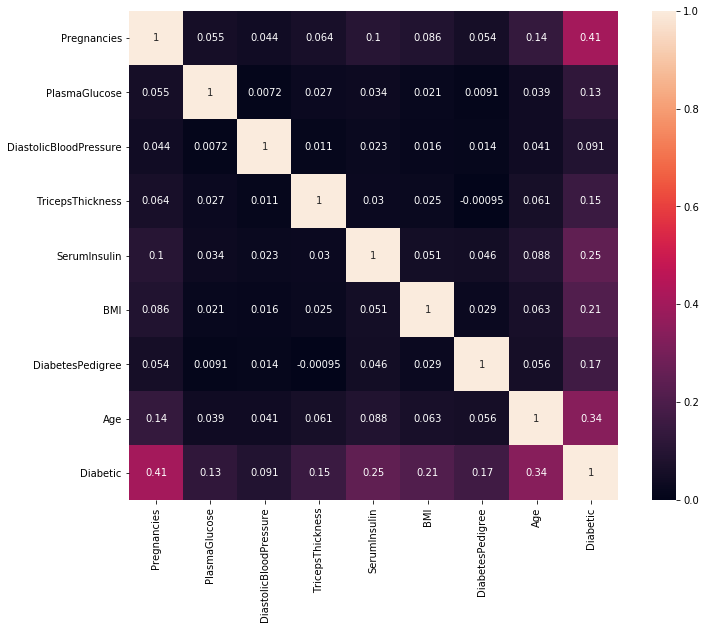

In [13]:
#Using Heatmap to visualize the correlation matrix

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(diabetes_data.corr(), vmax=1, annot=True,square=True);
plt.show()

[0.31765677 0.08439364 0.04726966 0.05562819 0.12876365 0.16937637
 0.0435184  0.15339332]


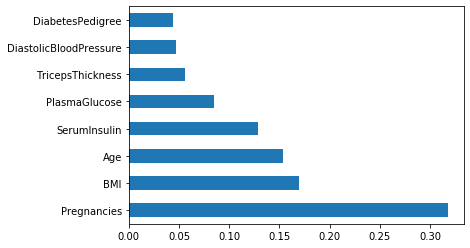

In [14]:
#Using RandomForest classifier for feature selection

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [15]:
# Feature scaling using MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#scalar = MinMaxScaler(feature_range = (0, 1))
#diabetes_data_scaled = scalar.fit_transform(diabetes_data)

In [16]:
#diabetes_data_scaled = pd.DataFrame(diabetes_data_scaled)
#diabetes_data_scaled

In [17]:
# Selecting features - [Preganancies,Glucose, Insulin, BMI, Age]
X = diabetes_data.iloc[:, [0, 1, 4, 5, 7]].values

#Labelled data
Y = diabetes_data.iloc[:, 8].values

### B. Feature Scaling using MinMaxScalar

In [18]:
# Feature scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0, 1))
scalar.fit_transform(X)
X

array([[  0.        , 171.        ,  23.        ,  43.50972593,
         21.        ],
       [  8.        ,  92.        ,  36.        ,  21.24057571,
         23.        ],
       [  7.        , 115.        ,  35.        ,  41.51152348,
         23.        ],
       ...,
       [  0.        ,  93.        ,  57.        ,  18.69068305,
         24.        ],
       [  0.        , 132.        , 161.        ,  19.7916451 ,
         23.        ],
       [  3.        , 114.        , 512.        ,  36.21543653,
         34.        ]])

In [19]:
#Setting the seed value

seed = 5
np.random.seed(seed)

In [20]:
#Splitting the data into train data and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

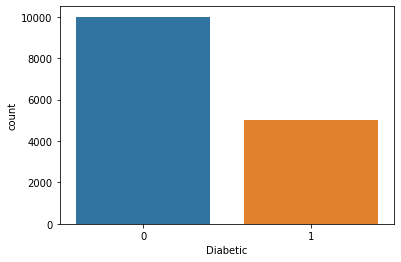

In [21]:
# Checking the count of 0 and 1 by plotting the countplot

sns.countplot(x = 'Diabetic',data = diabetes_data)

In [22]:
#Using the SMOTE library for balancing the outcome.

from imblearn.over_sampling import SMOTE

# transform the dataset
smote = SMOTE(random_state=2)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [23]:
#Before Oversampling - Checking the shape of data and count of outcome

print("The shape of X_train before oversampling = {}".format(X_train.shape))
print("The shape of Y_train before oversampling = {}".format(y_train.shape))

print("The count of label 0 before oversampling = {}".format(sum(y_train == 0)))
print("The count of label 1 before oversampling = {}".format(sum(y_train == 1)))

#After Oversampling - Checking the shape of data and count of outcome
  
print("The shape of X_train_smote after oversampling = {}".format(X_train_smote.shape))
print("The shape of Y_train before oversampling = {}".format(y_train_smote.shape))

print("The count of label 0 before after oversampling = {}".format(sum(y_train_smote == 0)))
print("The count of label 1 before after oversampling = {}".format(sum(y_train_smote == 1)))

The shape of X_train before oversampling = (10500, 5)
The shape of Y_train before oversampling = (10500,)
The count of label 0 before oversampling = 7014
The count of label 1 before oversampling = 3486
The shape of X_train_smote after oversampling = (14028, 5)
The shape of Y_train before oversampling = (14028,)
The count of label 0 before after oversampling = 7014
The count of label 1 before after oversampling = 7014


# Part 4: Parameter Optimization

In [24]:
# Importing required sklearn and keras packages
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold

Using TensorFlow backend.
C:\Users\Ruchira\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ruchira\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ruchira\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ruchira\anaconda3\lib\site-packages\tensorflow\python\framework\d

### 1. Tuning Batch Size and Number of Epochs

In [25]:
# Creating the model
def define_model():
    model = Sequential()
    model.add(Dense(10, input_dim = 5, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

#Checking the summary of model
model = define_model()
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# Model Initialization with Keras Classifier
model = KerasClassifier(build_fn=define_model,verbose=0)

In [27]:
# Defining the batch size and number of epochs

batch_size = [50, 100, 150, 200, 250, 300] 
epochs = [200, 400, 600, 800, 1000]

In [28]:
# Creating a dictionay of the grid search paramters (batch size and epochs)
param_grid = {'batch_size':batch_size,'epochs':epochs}

In [29]:
# Buidling the grid using GridSearchCV
grid = GridSearchCV(estimator=model,param_grid = param_grid, cv= 5, verbose=10, return_train_score=True, n_jobs=-1)

#Fitting the grid
grid_search = grid.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 15.5min
C:\Users\Ruchira\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]:

In [30]:
# Summarizing the result - Best Accuracy using batch size and epochs
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.8609247446060181, using {'batch_size': 50, 'epochs': 800}


In [31]:
# finding the mean train accuracy, mean test accuracy and standard deviation
means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

0.8324780344963074 0.8053141593933105 (0.0451107865684758) with: {'batch_size': 50, 'epochs': 200}
0.8273995995521546 0.7735853433609009 (0.10365952763638929) with: {'batch_size': 50, 'epochs': 400}
0.8374857306480408 0.806456458568573 (0.057585761831308827) with: {'batch_size': 50, 'epochs': 600}
0.8693859219551087 0.8609247446060181 (0.033253441176752344) with: {'batch_size': 50, 'epochs': 800}
0.8692795872688294 0.8534358382225037 (0.018410870583746918) with: {'batch_size': 50, 'epochs': 1000}
0.8052647709846497 0.7713114500045777 (0.0443538159955809) with: {'batch_size': 100, 'epochs': 200}
0.8106284260749816 0.7902057290077209 (0.011986783118855305) with: {'batch_size': 100, 'epochs': 400}
0.872042441368103 0.8522230744361877 (0.01923412617982181) with: {'batch_size': 100, 'epochs': 600}
0.8324946284294128 0.8220785856246948 (0.049876847248419974) with: {'batch_size': 100, 'epochs': 800}
0.8586940288543701 0.83603835105896 (0.05011338120571865) with: {'batch_size': 100, 'epochs': 

### 2. Tuning Optimization Algorithm

In [32]:

# Creating the model
def define_model(optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(10, input_dim = 5, activation= 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile the model
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

# Model Initialization by Keras Classifier
model = KerasClassifier(build_fn = define_model, epochs = 800, batch_size = 50, verbose = 0)

# Defining the grid search parameter - optimizer
optimizer = ['Adam', 'Adadelta', 'Adamax', 'Adagrad', 'SGD', 'RMSprop']

# Creating a dictionary of grid search parameter
param_grid = {'optimizer' : optimizer}

# Building the grid using GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = 10, return_train_score=True, n_jobs=-1)

# Fitting the grid
grid_search = grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  9.1min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  9.1min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 11.7min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.7min finished


In [33]:
# Summarizing the result - Best Accuracy using optimizer
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.8758923768997192, using {'optimizer': 'Adam'}


In [34]:
# finding the mean train accuracy, mean test accuracy and standard deviation
means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

0.8829488635063172 0.8758923768997192 (0.00977940450125533) with: {'optimizer': 'Adam'}
0.8819324851036072 0.8718293309211731 (0.01964630742926397) with: {'optimizer': 'Adadelta'}
0.8551291584968567 0.8277724862098694 (0.036372153865843936) with: {'optimizer': 'Adamax'}
0.7816328287124634 0.7414438009262085 (0.04155701496867145) with: {'optimizer': 'Adagrad'}
0.7972105503082275 0.7777220726013183 (0.05244766647497512) with: {'optimizer': 'SGD'}
0.8847127676010131 0.8729007482528687 (0.024457266789138146) with: {'optimizer': 'RMSprop'}


### 3. Tuning Learning Rate

In [36]:
from keras.optimizers import Adam

# Creating the model
def define_model(lr = 0.01):
    model = Sequential()
    model.add(Dense(10,input_dim = 5, activation= 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = lr)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Model Initialization using Keras Classifier
model = KerasClassifier(build_fn = define_model, epochs = 800, batch_size =50,verbose=0)

# Defining the grid search parameter - learning rate
lr = [0.001, 0.01, 0.1]

# Creating a dictionay of the grid search parameter - learning rate
param_grid = dict(lr = lr)

# Building the grid using GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 10, return_train_score=True, n_jobs = -1, cv=5)

#Fitting the grid
grid_search = grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  3.3min remaining: 21.6min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.3min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.3min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.3min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  6.6min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  6.6min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.6min finished


In [37]:
#Finding best accuracy using learning rate
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.8471689224243164, using {'lr': 0.001}


In [38]:
#Summarize the results - mean train accuracy, mean test accuracy, standard deviation

means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

0.8537563562393189 0.8471689224243164 (0.04836330903384387) with: {'lr': 0.001}
0.8592639923095703 0.8279143452644349 (0.025074653469596423) with: {'lr': 0.01}
0.5499888300895691 0.3000353217124939 (0.16255269139347506) with: {'lr': 0.1}


### 4. Tuning Kernel Initializer

In [39]:

# Creating the model
def define_model(init='uniform'):
    model = Sequential()
    model.add(Dense(10, input_dim = 5, kernel_initializer= init, activation= 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# Model Initialization using keras classifier
model = KerasClassifier(build_fn = define_model, epochs = 800, batch_size = 50, verbose=0)

# Defining the grid search parameter - kernel initializer
init = ['uniform', 'normal', 'zero']

# Creating a dictionary of grid search parameter
param_grid = dict(init = init)

# Building the grid using GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 10, n_jobs = -1, return_train_score=True, cv = 5)

#Fitting the grid
grid_search = grid.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  3.6min remaining: 23.6min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.7min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.7min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.7min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  6.9min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  7.0min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.0min finished


In [40]:
#Finding best accuracy using best kernel initializer
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.8660545945167542, using {'init': 'uniform'}


In [41]:
# Summarize the results - Mean train accuracy, Mean Test accuracy, standard deviation
means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

0.8798477053642273 0.8660545945167542 (0.01505414091690006) with: {'init': 'uniform'}
0.8744309782981873 0.8425215721130371 (0.0682346089104642) with: {'init': 'normal'}
0.5499888300895691 0.3000353217124939 (0.16255269139347506) with: {'init': 'zero'}


### 5. Tuning Activation Function

In [42]:

#Creating the model
def define_model(activation='relu'):
    model = Sequential()
    model.add(Dense(10, input_dim = 5, kernel_initializer= 'uniform', activation= activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# Model Initialization using keras classifier
model = KerasClassifier(build_fn = define_model, epochs = 800, batch_size = 50, verbose=0)

# Define the activation function - grid search parameter
activation = ['softmax', 'relu', 'tanh', 'linear', 'sigmoid'] # most common activations

# Creating a dictionary of activation function - grid search parameter
param_grid = dict(activation = activation)

# Builing the grid using GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 10, n_jobs = -1, return_train_score=True, cv = 5)

#Fitting the grid 
grid_search = grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  7.4min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  7.4min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 11.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed: 11.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.7min finished


In [43]:
#Finding the best accuracy using best activation function
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.8920037746429443, using {'activation': 'sigmoid'}


In [44]:
# Summarizing the result - mean train accuracy, mean test accuracy, standard deviation

means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

0.8741620779037476 0.866487181186676 (0.035465136006480096) with: {'activation': 'softmax'}
0.8825918674468994 0.8744701027870179 (0.029860805783817276) with: {'activation': 'relu'}
0.8922337651252746 0.8814510703086853 (0.007623671396843469) with: {'activation': 'tanh'}
0.7607288002967835 0.7142797589302063 (0.06660839143127936) with: {'activation': 'linear'}
0.9004312753677368 0.8920037746429443 (0.015835573286200985) with: {'activation': 'sigmoid'}


### 6. Tuning Number of Neurons

In [45]:

# Creating the model
def define_model(neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 5, kernel_initializer= 'uniform', activation= 'sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.1)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Model Intialization using keras classifier
model = KerasClassifier(build_fn = define_model, epochs = 800, batch_size = 50, verbose = 0)

# Define the grid search parameter - number of neurons
neurons = [1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Creating a dictionary of the grid search parameter - number of neurons
param_grid = dict(neurons=neurons)

# Building the fit using GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = 10, n_jobs = -1)

# Fitting the grid
grid_search = grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done  46 out of  55 | elapsed: 25.8min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done  52 out of  55 | elapsed: 30.5min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed: 30.6min finished


In [46]:
# Finding best accuracy using best value of neurons
print("Best: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best: 0.764420998096466, using {'neurons': 50}


In [47]:
# Summarizing the result - mean train accuracy, mean test accuracy. standard deviation

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

0.3000353217124939 (0.16255269139347506) with: {'neurons': 1}
0.764420998096466 (0.133560287285747) with: {'neurons': 50}
0.3000353217124939 (0.16255269139347506) with: {'neurons': 100}
0.30181785821914675 (0.1647212455059818) with: {'neurons': 150}
0.5643980383872986 (0.2495238319154228) with: {'neurons': 200}
0.30181785821914675 (0.1647212455059818) with: {'neurons': 250}
0.358553421497345 (0.2059093963348184) with: {'neurons': 300}
0.5841408133506775 (0.2597736558454178) with: {'neurons': 350}
0.4999646782875061 (0.2576999200509476) with: {'neurons': 400}
0.5000353217124939 (0.2576999200509476) with: {'neurons': 450}
0.37088350057601926 (0.22302058115426332) with: {'neurons': 500}


## Part 5: Data Modelling using optimized parameters

In [26]:
#Creating the model
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(50, input_dim = 5, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(1, activation='sigmoid'))
    
# compile the model
adam = Adam(lr = 0.001)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
 
#Fitting the model
history = model.fit(X_train_smote, y_train_smote, validation_data = (X_test,y_test), epochs = 800, batch_size = 50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 14028 samples, validate on 4500 samples
Epoch 1/800
14028/14028 [==============================] - 0s 28us/step - loss: 0.5687 - accuracy: 0.7176 - val_loss: 0.5072 - val_accuracy: 0.7649
Epoch 2/800
14028/14028 [==============================] - 0s 20us/step - loss: 0.4982 - accuracy: 0.7849 - val_loss: 0.4832 - val_accuracy: 0.7844
Epoch 3/800
14028/14028 [==============================] - 0s 20us/step - loss: 0.4574 - accuracy: 0.8082 - val_loss: 0.4605 - val_accuracy: 0.7911
Epoch 4/800
14028/14028 [==============================] - 0s 19us/step - loss: 0.4200 - accuracy: 0.8296 - val_loss: 0.3926 - val_accuracy: 0.8189
Epoch 5/800
14028/14028 [==============================] - 0s 19us/step - loss: 0.3862 - accuracy: 0.8414 - val_loss: 0.3655 - val_accuracy: 0.8311
Epoch 6/800
14028/14028 [==============================] - 0s 19us/step - loss: 0.3568 - accuracy: 0.8530 - val_loss

## Part 6: Model Evaluation

In [27]:
#Evaluating train accuracy
model.evaluate(X_train_smote, y_train_smote)

14028/14028 [==============================] - 0s 13us/step


[0.20377902120207325, 0.9196606874465942]

In [28]:
#Evaluating test accuracy
from sklearn.metrics import accuracy_score

Y_pred_nn = model.predict(X_test)
Y_pred_nn = (Y_pred_nn > 0.5)
test_accuracy_nn = accuracy_score(y_test, Y_pred_nn)
print("Test accuracy of Neural Network is " + str(test_accuracy_nn * 100))

Test accuracy of Neural Network is 90.91111111111111


In [29]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_nn)
cm

array([[2760,  226],
       [ 183, 1331]], dtype=int64)

In [33]:
# Classification Report
from sklearn.metrics import classification_report, precision_score, recall_score,f1_score
print(classification_report(y_test, Y_pred_nn))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2986
           1       0.85      0.88      0.87      1514

    accuracy                           0.91      4500
   macro avg       0.90      0.90      0.90      4500
weighted avg       0.91      0.91      0.91      4500



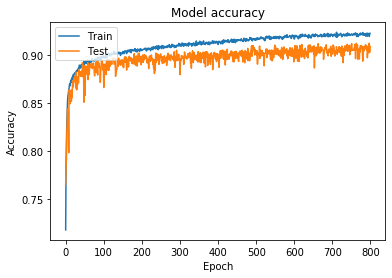

In [34]:
#Plot of Model Accuracy vs Epoch

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

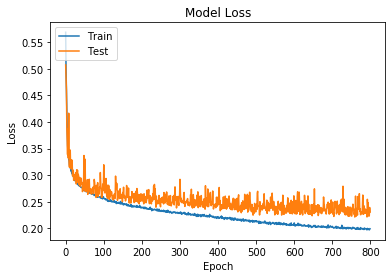

In [35]:
#Plot of Model Loss vs Epoch

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()